In [84]:
#DAY 13
import numpy as np
import pandas as pd

In [85]:
df = pd.read_csv('/content/placement.csv')

In [86]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [87]:
df.shape

(100, 4)

In [88]:
df= df.iloc[:,1:] #removes the first column
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [89]:
#Steps

#0. Preprocess + EDA + Feature Selection
#1. Extract input and output cols
#2. Scale the values
#3. Train test split
#4. Train the model
#5. Evaluate the model/model selection
#6. Deploy the model

In [90]:
import matplotlib.pyplot as plt

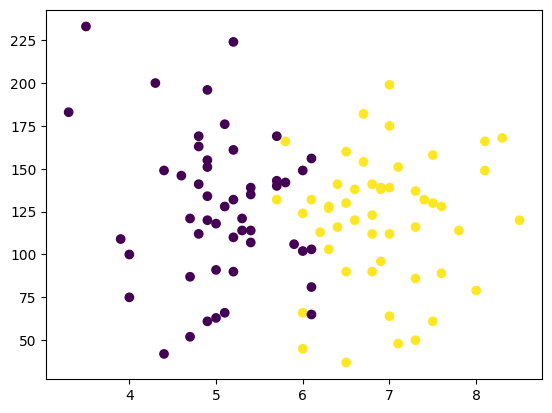

In [91]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #logistoc regression to seperate values

In [92]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]
x #input values

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [93]:
y #output values

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [94]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)  #10% of the data will be asigned to test data & 90% to training

In [95]:
x_train

,cgpa,iq
3,7.4,132.0
13,6.4,116.0
35,6.8,90.0
4,5.8,142.0
77,7.3,50.0
...,...,...
8,6.1,156.0
58,8.0,79.0
79,6.5,90.0
10,6.0,45.0


In [96]:
y_train

,placement
3,1
13,1
35,1
4,0
77,1
...,...
8,0
58,1
79,1
10,1


In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [98]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 1.39375076,  0.20636765],
       [ 0.47412049, -0.19305361],
       [ 0.8419726 , -0.84211315],
       [-0.07765767,  0.45600594],
       [ 1.30178773, -1.8406663 ],
       [-0.81336188, -1.51613653],
       [ 0.8419726 ,  0.43104211],
       [-1.08925096, -0.91700464],
       [ 0.65804654,  0.35615062],
       [-1.08925096, -0.06823446],
       [ 0.65804654, -0.09319829],
       [-0.62943583,  2.50303989],
       [-0.81336188, -0.81714932],
       [ 0.01430536, -0.44269189],
       [-0.62943583,  0.20636765],
       [ 0.38215747,  0.08154851],
       [-1.73299214, -0.59247487],
       [-1.18121398,  0.55586125],
       [-0.9053249 ,  1.80405268],
       [-0.72139885,  0.10651234],
       [-0.44550977,  0.38111445],
       [-0.62943583, -0.34283658],
       [-0.99728793,  0.43104211],
       [ 1.11786168,  0.68068039],
       [-0.16962069,  0.40607828],
       [-0.44550977, -0.24298127],
       [-0.99728793,  1.13002931],
       [ 1.48571378,  0.8554272 ],
       [ 0.93393562,

In [99]:
x_test = scaler.transform(x_test)
x_test

array([[ 1.57767681, -0.86707698],
       [ 2.03749194,  1.05513782],
       [-0.62943583, -0.84211315],
       [-0.5374728 , -0.24298127],
       [ 1.11786168, -1.89059396],
       [ 0.93393562,  0.38111445],
       [ 2.03749194,  0.63075274],
       [-0.16962069,  0.20636765],
       [ 1.02589865,  1.27981228],
       [ 2.40534405, -0.09319829]])

In [100]:
#model training

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [101]:
clf.fit(x_train,y_train)

LogisticRegression()

In [105]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [103]:
y_test

,placement
42,1
65,1
28,0
46,0
5,1
60,1
37,1
87,1
52,1
69,1


In [106]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

In [107]:
#decision boundary-> pattern noticed by the ml model

from mlxtend.plotting import plot_decision_regions

<Axes: >

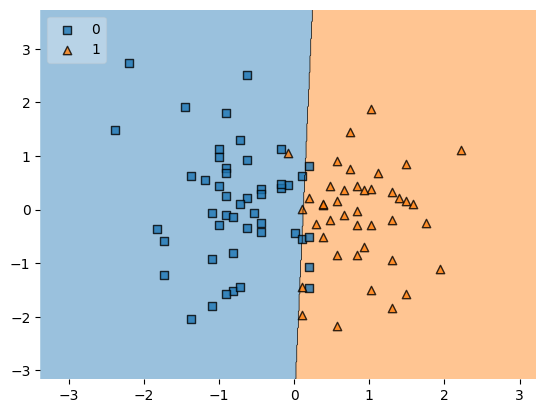

In [111]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [112]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))